<a href="https://colab.research.google.com/github/igor531205/Social_media/blob/main/NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пушкарев Игорь Игоревич. Группа 23.М08-мм.
## NetworkX

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings as warn

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

 1.   ✅ Построить граф и визуализировать его. [Данные берем тут](https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network/data).


In [2]:
hero_csv = 'hero-network.csv'
uploaded = files.upload_file(hero_csv) # Загружаем файл hero-network.csv

hero_df = pd.read_csv(hero_csv) # Считываем данные
hero_df.head(3) # Выводим 5 строк

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA


In [3]:
nodes_csv = 'nodes.csv'
uploaded = files.upload_file(nodes_csv) # Загружаем файл nodes.csv

nodes_df = pd.read_csv(nodes_csv) # Считываем данные
nodes_df.head(3) # Выводим 5 строк

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic


In [4]:
edges_csv = 'edges.csv'
uploaded = files.upload_file(edges_csv) # Загружаем файл edges.csv

edges_df = pd.read_csv(edges_csv) # Считываем данные
edges_df.head(3) # Выводим 5 строк

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5


In [ ]:
nodes_df['type'].unique()

array(['comic', 'hero'], dtype=object)

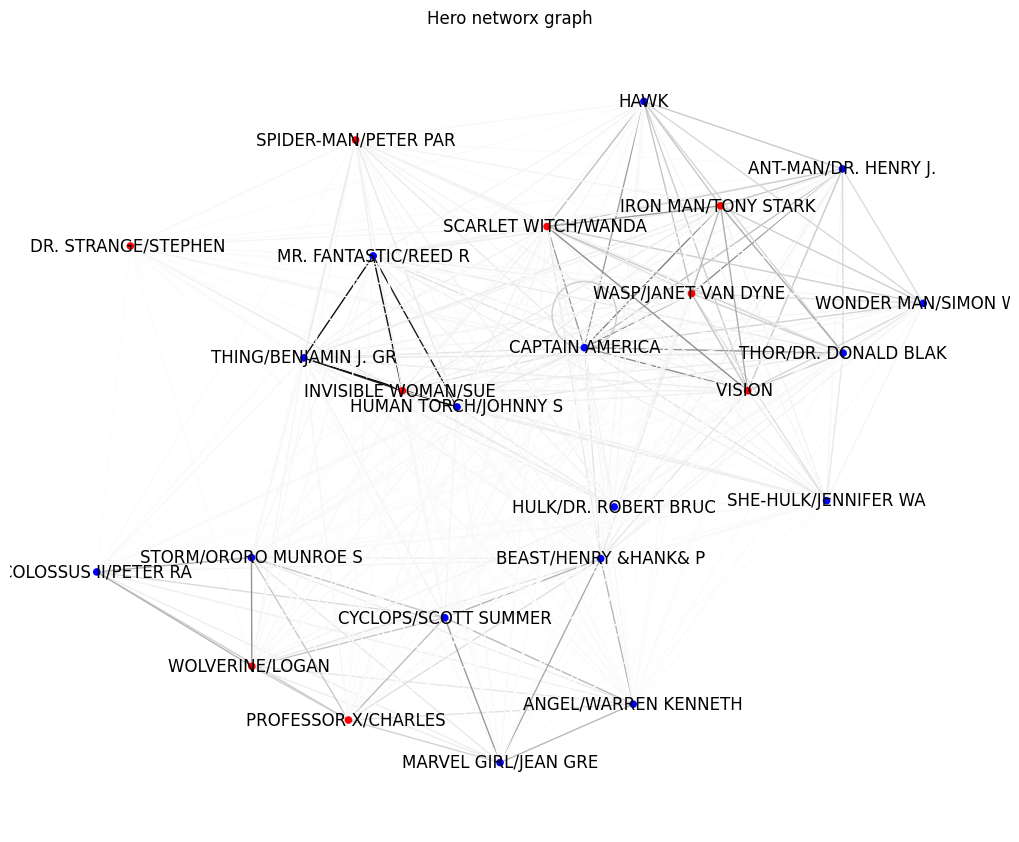

In [ ]:
G = nx.Graph()

# Добавление узлов
nodes_list = nodes_df.to_dict('records')
G.add_nodes_from((node['node'], {'type': node['type']}) for node in nodes_list)

# Добавление рёбер между героями
hero_edges_list = hero_df.groupby(['hero1', 'hero2']).size().reset_index(name='weight').to_dict('records')
G.add_edges_from((edge['hero1'], edge['hero2'], {'weight': edge['weight']}) for edge in hero_edges_list)

# Удаление изолированных узлов
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Удаление узлов с низким количеством связей, которые он имеет с другими узлами.
low_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree < 1000]
G.remove_nodes_from(low_degree_nodes)

# Установить цвета
node_colors = ['blue' if G.nodes[node].get('type') == 'hero' else 'red' for node in G]

edge_colors = [G[i][j]['weight'] for i, j in G.edges()]
max_edge_weight = max(edge_colors)
edge_colors = [weight / max_edge_weight for weight in edge_colors]

# Показать граф
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=20, node_color=node_colors, edge_color=edge_colors, edge_cmap=plt.cm.Greys)
plt.title('Hero networx graph')
plt.show()

2.   ✅ Посчитать на нём меры центральности с помощью встроенных функций библиотеки и визуально выделить на графе узлы, которые обладают наибольшими значениями мер центральности. Меры центральности, с которыми ведётся работа:
*   Степень близости (closeness centrality);
*   Степень посредничества (betweenness centrality);
*   Степень влиятельности (eigenvector centrality).

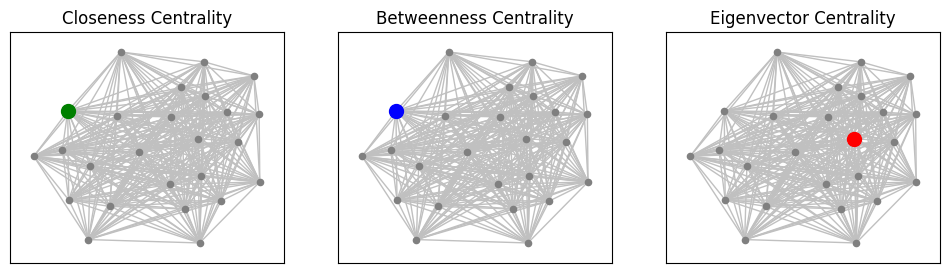

In [ ]:
G = nx.Graph()

# Добавление узлов
nodes_list = nodes_df.to_dict('records')
G.add_nodes_from((node['node'], {'type': node['type']}) for node in nodes_list)

# Добавление рёбер между героями
hero_edges_list = hero_df.groupby(['hero1', 'hero2']).size().reset_index(name='weight').to_dict('records')
G.add_edges_from((edge['hero1'], edge['hero2'], {'weight': edge['weight']}) for edge in hero_edges_list)

# Удаление изолированных узлов
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Удаление узлов с низким количеством связей, которые он имеет с другими узлами.
low_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree < 1000]
G.remove_nodes_from(low_degree_nodes)

# Расчет мер центральности
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, max_iter=100)

# Выбор наиболее значимых узлов
top_closeness = max(closeness, key=closeness.get)
top_betweenness = max(betweenness, key=betweenness.get)
top_eigenvector = max(eigenvector, key=eigenvector.get)

# Словарь с мерами центральности и соответствующими цветами
centralities = {
    'Closeness Centrality': (top_closeness, 'green'),
    'Betweenness Centrality': (top_betweenness, 'blue'),
    'Eigenvector Centrality': (top_eigenvector, 'red')
}

# Отрисовка всех узлов и рёбер
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes = axes.flatten()

pos = nx.spring_layout(G)
for i, (title, (centrality, color)) in enumerate(centralities.items()):
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='gray', ax=axes[i])
    nx.draw_networkx_edges(G, pos, edge_color='#c0c0c0', ax=axes[i])
    nx.draw_networkx_nodes(G, pos, nodelist=[centrality], node_size=100, node_color=color, ax=axes[i])
    axes[i].set_title(title)

plt.show()

3.   ✅ Реализовать вручную, не используя встроенные функции библиотеки networx для работы с мерами центральности, расчет следующих мер центральности и выделить на графе узлы с наибольшими значениями меры:
*   Степень близости (closeness centrality);
*   Степень влиятельности (eigenvector centrality).

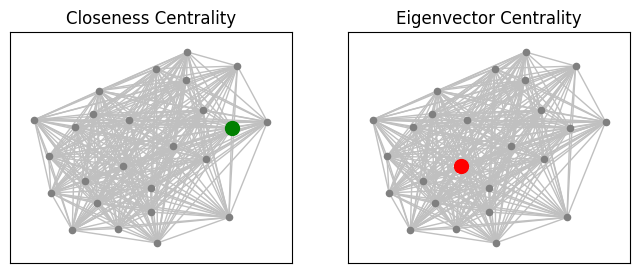

In [ ]:
G = nx.Graph()

# Добавление узлов
nodes_list = nodes_df.to_dict('records')
G.add_nodes_from((node['node'], {'type': node['type']}) for node in nodes_list)

# Добавление рёбер между героями
hero_edges_list = hero_df.groupby(['hero1', 'hero2']).size().reset_index(name='weight').to_dict('records')
G.add_edges_from((edge['hero1'], edge['hero2'], {'weight': edge['weight']}) for edge in hero_edges_list)

# Удаление изолированных узлов
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Удаление узлов с низким количеством связей, которые он имеет с другими узлами.
low_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree < 1000]
G.remove_nodes_from(low_degree_nodes)

# Расчет степени близости
def calculate_closeness_centrality(G):
    closeness_centrality = {}
    for node in G.nodes():
        shortest_path_lengths = nx.single_source_shortest_path_length(G, node)
        total_distance = sum(shortest_path_lengths.values())
        closeness_centrality[node] = (len(G) - 1) / total_distance if total_distance > 0 else 0
    return closeness_centrality

# Расчет степени влиятельности
def calculate_eigenvector_centrality(G, max_iter=100, tol=1e-6):
    # Создаем матрицу смежности
    A = nx.adjacency_matrix(G).todense()
    # Инициализируем вектор центральности
    n = len(G)
    x = np.ones(n) / np.sqrt(n)
    for _ in range(max_iter):
        x_new = A @ x
        x_new /= np.linalg.norm(x_new)

        if np.linalg.norm(x_new - x) < tol:
            return dict(zip(G.nodes, x_new))
        x = x_new
    return dict(zip(G.nodes, x))

# Расчет мер центральности
closeness = calculate_closeness_centrality(G)
eigenvector = calculate_eigenvector_centrality(G)

# Выбор наиболее значимых узлов
top_closeness = max(closeness, key=closeness.get)
top_eigenvector = max(eigenvector, key=eigenvector.get)

# Словарь с мерами центральности и соответствующими цветами
centralities = {
    'Closeness Centrality': (top_closeness, 'green'),
    'Eigenvector Centrality': (top_eigenvector, 'red')
}

# Отрисовка всех узлов и рёбер
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axes = axes.flatten()

pos = nx.spring_layout(G)
for i, (title, (centrality, color)) in enumerate(centralities.items()):
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='gray', ax=axes[i])
    nx.draw_networkx_edges(G, pos, edge_color='#c0c0c0', ax=axes[i])
    nx.draw_networkx_nodes(G, pos, nodelist=[centrality], node_size=100, node_color=color, ax=axes[i])
    axes[i].set_title(title)

plt.show()

4.   ✅ Визуализировать встроенный в библиотеку NetworkX граф Les Miserables.

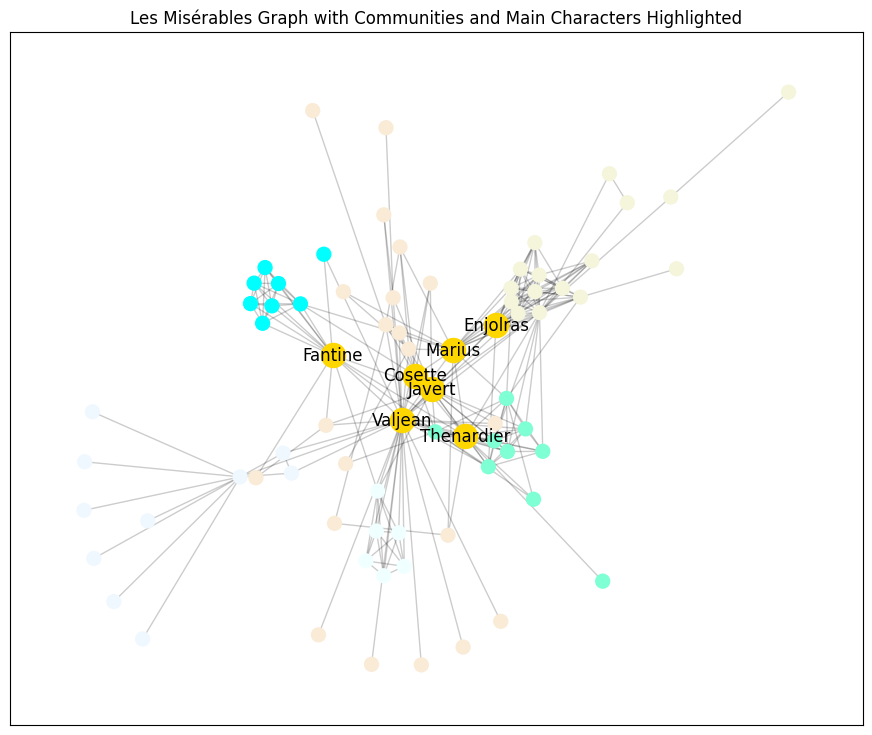

In [ ]:
# Загрузка графа "Les Misérables"
G = nx.les_miserables_graph()

# Обнаружение сообществ с помощью алгоритма Лувена
communities = nx.community.louvain_communities(G)

# Главные герои
main_characters = ['Valjean', 'Javert', 'Fantine', 'Cosette', 'Marius', 'Thenardier', 'Enjolras']

# Выбор цветов для сообществ
community_colors = {}
for i, community in enumerate(communities):
    color = mcolors.CSS4_COLORS[list(mcolors.CSS4_COLORS.keys())[i]]  # Выбор цвета для сообщества
    for node in community:
        community_colors[node] = color

# Визуализация
plt.figure(figsize=(11, 9))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Отрисовка узлов сообществ
nx.draw_networkx_nodes(G, pos, node_color=[community_colors[node] for node in G.nodes()], node_size=100)

# Выделение главных героев
nx.draw_networkx_nodes(G, pos, nodelist=main_characters, node_color='gold', node_size=300)

# Добавление подписей для главных героев
nx.draw_networkx_labels(G, pos, labels={node: node for node in main_characters}, font_size=12, font_color='black')

plt.title("Les Misérables Graph with Communities and Main Characters Highlighted")
plt.show()


5.   ✅ Используя встроенные функции NetworkX реализовать выделение сообществ с помощью алгоритмов Гирван-Ньюмена и Лувена, визуализировать с помощью выделения цветом наилучшее разбиение на сообщества с точки зрения модулярности.

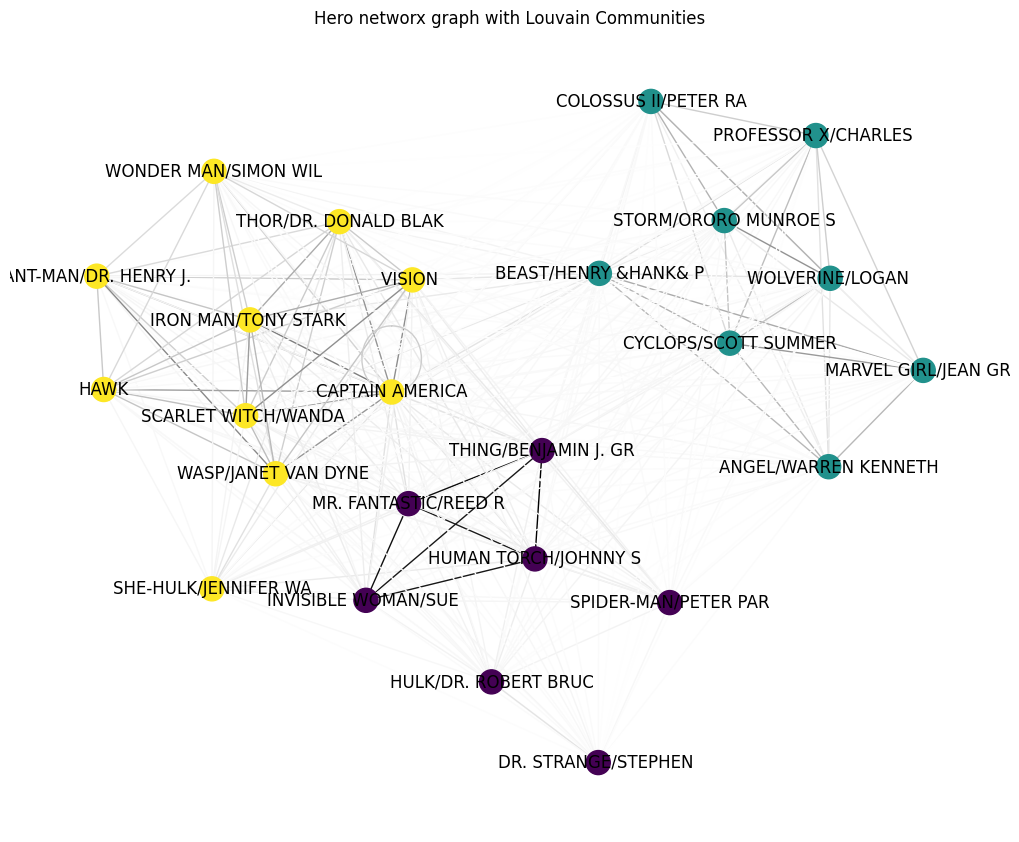

In [ ]:
G = nx.Graph()

# Добавление узлов
nodes_list = nodes_df.to_dict('records')
G.add_nodes_from((node['node'], {'type': node['type']}) for node in nodes_list)

# Добавление рёбер между героями
hero_edges_list = hero_df.groupby(['hero1', 'hero2']).size().reset_index(name='weight').to_dict('records')
G.add_edges_from((edge['hero1'], edge['hero2'], {'weight': edge['weight']}) for edge in hero_edges_list)

# Удаление изолированных узлов
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Удаление узлов с низким количеством связей, которые он имеет с другими узлами.
low_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree < 1000]
G.remove_nodes_from(low_degree_nodes)

# Применение алгоритма Гирвана-Ньюмена
communities_girvan_newman = next(nx.community.girvan_newman(G))
modularity_girvan_newman = nx.community.modularity(G, communities_girvan_newman)

# Применение алгоритма Лувена
communities_louvain = nx.community.louvain_communities(G)
modularity_louvain = nx.community.modularity(G, communities_louvain)

# Выбор лучшего разбиения на сообщества
if modularity_girvan_newman > modularity_louvain:
    best_communities = communities_girvan_newman
    method = 'Girvan-Newman'
else:
    best_communities = communities_louvain
    method = 'Louvain'

# Визуализация
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

# Назначение цветов узлам
community_color = {node: i for i, comm in enumerate(best_communities) for node in comm}
colors = [community_color[node] for node in G.nodes()]

edge_colors = [G[i][j]['weight'] for i, j in G.edges()]
max_edge_weight = max(edge_colors)
edge_colors = [weight / max_edge_weight for weight in edge_colors]

# Отрисовка узлов сообществ
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color=edge_colors, edge_cmap=plt.cm.Greys)

# Показать граф
plt.title(f'Hero networx graph with {method} Communities')
plt.show()

6.   ✅ Не пользуясь встроенными функциями NetworkX для выделения сообществ, реализовать алгоритм CFinder, визуализировать результат.

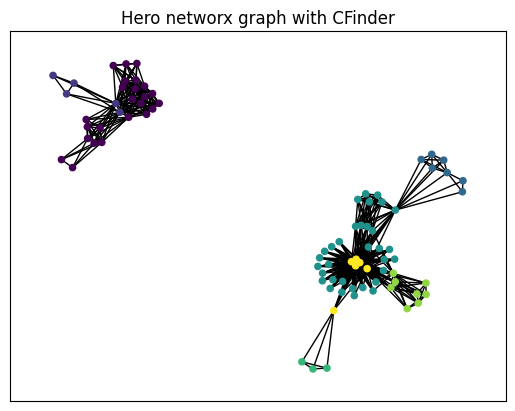

In [88]:
# Реализация алгоритма CFinder
def CFinder(graph, k):
    cliques = list(nx.find_cliques(graph))
    k_cliques = [clique for clique in cliques if len(clique) >= k]

    # Функция проверки общих узлов
    def share_k_minus_1_nodes(clique1, clique2):
        return len(set(clique1) & set(clique2)) >= k - 1

    communities = []
    for clique in k_cliques:
        added_to_existing = False
        for community in communities:
            if any(share_k_minus_1_nodes(clique, community_clique) for community_clique in community):
                community.append(clique)
                added_to_existing = True
                break
        if not added_to_existing:
            communities.append([clique])
    merged_communities = []
    for community in communities:
        merged_community = set()
        for clique in community:
            merged_community.update(clique)
        merged_communities.append(merged_community)

    return merged_communities

G = nx.Graph()

# Добавление узлов
nodes_list = nodes_df.to_dict('records')
G.add_nodes_from((node['node'], {'type': node['type']}) for node in nodes_list)

# Добавление рёбер между героями
G = nx.from_pandas_edgelist(hero_df.head(700), 'hero1', 'hero2')

# Удаление изолированных узлов
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Находим сообщества на основе 3-клик
k = 3
communities = CFinder(G, k)

# Назначение цветов узлам
community_colors = {node: i for i, community in enumerate(communities) for node in community}
colors = [community_colors.get(node, len(communities)) for node in G.nodes()]

# Отрисовка узлов сообществ
nx.draw_networkx(G, node_color=colors, node_size=20, with_labels=False)

# Показать граф
plt.title(f'Hero networx graph with CFinder')
plt.show()